<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Alumnos:** Berlín Isabel Preciado Escalera, Mateo Verea Dorantes y Cuauhemoc Corrales Camacho

**Fecha:** 14 de octubre del 2021

**Expediente** : if723259,if709396 y if720482
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/berlinpreciado21/ProyectoSimFin_CCorrales_BIPreciado_MVerea




# Proyecto 
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que utilice datos reales, ya sea de una empresa física real o de alguna página de internet que proporcione bases de datos confiables. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del problema con ciertas variables de interés.

### 1.1 Título
### Predicción, compras de clientes en un supermercado 

### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  -  Predecir el impacto y comportamiento de futuras compras realizadas en distintos sitios apartir de sus preferencias al realizar una compra.
> #### 1.2 Objetivos específicos.  
>  - Descargar los datos disponibles y limpiar nuestra base de datos.
>  - Analizar la composición de cada una de las variables para determinar que distribuciones se aproximan de mejor manera
>  - Simular nuestras variables de interés en función a la distribución observada para cada una en un período futuro.


### 1.3 Definición del problema.
>El drastico cambió que provocó el virus COVID-19, causó que el comercio electronico aumentara para adquirir productos básicos por la necesidad de quedarse en casa, el distanciamiento social, el confinamiento y otras medidas tomadas en respuesta a la pandemia han llevado a los consumidores a aumentar las compras en línea. Esta tendencia, que comenzó en el confinamiento y que desde entonces ha perdurado, está obligando a supermercados a revisar su plan comercial para adaptarse a los nuevos hábitos, COVID-19 ha hecho que los consumidores alrededor del mundo estén adaptando nuevas tendencias de consumo, menos visitas a puntos de ventas, compras más grandes, visitas a supermercados más cerca del hogar, compras por internet, etc. 
>
>En este proyecto, buscaremos predecir el impacto y la preferencia que pueden tener los compradores al momento de realizar una compra y al sitio al que incurren para realizarla, ya sea mediante una compra en línea, en tienda o catalógo.Para esto nos basaremos en ciertos aspectos importantes, las preferencias del cliente en el sitio y en el producto.

### 1.4  Escenario de negocio a modelar 


 >El escenario a modelar son las distintas compras que la muestra de clientes realizó tras una serie de campañas promocionales. Se simularán escenarios de compras que los clientes en un próximo horizonte de tiempo con el objetivo de afirmar si las campañas aumentaran el número de compras y los ingresos generados hacia la empresa comercial. La finalidad de la simulación es ver el comportamiento que un cliente con denotaciones similares a aquellos en la muestra puede mostrar en un futuro, ver que grupo de productos son más comprados y que medio de compra es el más utilizado.  

### 1.5 Nodos o escenarios a simular

>La base de datos descargada cuenta con 17 variables que se clasifican en 3 grupos: atributos del cliente, atributos de producto y atributos de lugar. Los atributos del cliente se refieren a datos que identifican a cada individuo, dentro de estos datos se tomara la variable “income” como una variable de salida, debido a que representa el objetivo de toda empresa, sus ganancias por ventas. Los atributos de producto se refieren al tipo de producto que la cadena comercial maneja, los agrupa en 5 secciones. Finalmente, los atributos de lugar describen el medio por el cual se realizó la compra, son tres diferentes métodos y todos se considerarán como nodos a analizar para tras las simulaciones descubrir cual medio de venta es el que genera mayores ganancias.  

### 1.6 Definición de hipótesis y supuestos.

>OBJETO DE ESTUDIO:
>- Como las compras en linea aumentan dependiendo de las campañas promocionales que utilizan las empresas y el impacto que la pandemia por Covid-19 afectó.
>
>HIPOTESIS: 
>- Las campañas promocionales y la pandemia por Covid-19 han aumentado exponencialmente las ventas en linea de casi todos los productos.
>
>SUPUESTOS: 
>- La gente ya no quiere salir de su casa para hacer compras.
>- Las campañas de promoción son fundamentales para las ventas en linea
>- La pandemia aumento el uso de plataformas de venta en linea.
>- La distribucion de las compras por sitio web son: 
$$0<x<5, P = 74.29\%$$
$$6<x<10, P = 23.79\%$$
$$10<x, P = 1.92\%$$

>- La distribucion de las compras por ordenes de catalogo son:
$$0<x<5, P = 84.87\%$$
$$6<x<10, P = 14.11\%$$
$$10<x, P = 1.03\%$$

>- La distribucion de las compras en tienda presencial son:
$$0<x<5, P = 67.50\%$$
$$6<x<10, P = 32.05\%$$
$$10<x, P = 0.45\%$$

>- La contribucion de cada tipo de compra al ingreso total es:
$$I(NWP) = 32.61\%$$ 
$$I(NCP) = 21.34\%$$
$$I(NSP) = 46.05\%$$ 
 
>- También el mes 0 del cual se calcularon las metricas anteriores tubo un conteo de compras de 25,737. Por lo que si:
$$ Conteo-Pasado < Conteo-Simulado$$
se considerara que las promociones propuestas inicialmente fue existosa al incrementar el numero de compras. 

### 1.7 Diagrama

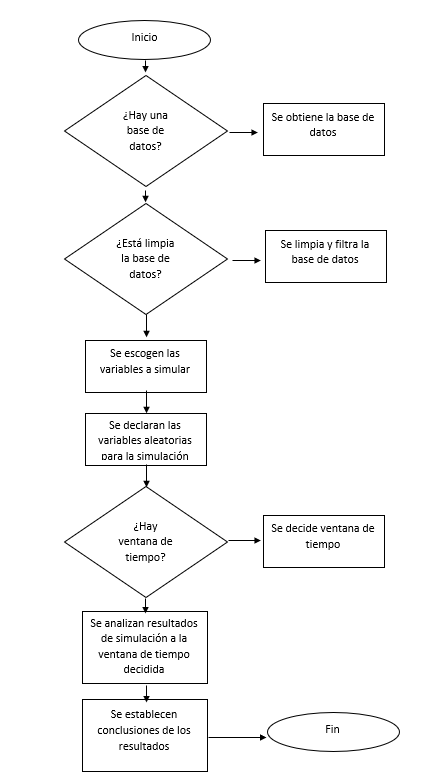

### 1.8 Visualizacion de base de datos

In [109]:
# Librerias a utilizar 
import pandas as pd
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import seaborn as sns
from scipy.optimize import fsolve
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

La base de datos a utlizar cuenta con un total de 17 variables que describen datos de los 2242 clientes preferentes que son utilizados como muestra. Para la aplicacion de los procesos se debe de filtrar de la base aquellas variables que sean binarias o cuyo valor sea del tipo alfanumerico. 

In [110]:
data=pd.read_excel("marketing_campaign.xlsx")
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0
2,4141,1965,Graduation,Together,71613.0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0
3,6182,1984,Graduation,Together,26646.0,2014-02-10,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0
4,5324,1981,PhD,Married,58293.0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0


In [111]:
def dqr(data):
    
    #%% Lista de variables de la base de datos
    columns = pd.DataFrame(list(data.columns.values),
                           columns= ['Nombres'],
                           index= list(data.columns.values)) 
    
    #%% Lista de tipos de datos
    data_types = pd.DataFrame(data.dtypes, columns=['Data_Types'])
    
    #%% lista de datos perdidos
    missing_values = pd.DataFrame(data.isnull().sum(),
                                  columns=['Missing_values']) 
    
    #%% lista de valores presentes
    present_values = pd.DataFrame(data.count(), 
                                  columns=['Present Values'])
    
    #%% Lista de valores únicos para cada variable
    unique_values = pd.DataFrame(columns=['Unique_Values'])
    for col in list(data.columns.values):
        unique_values.loc[col] = [data[col].nunique()]

    #%% Lista de valores mínimos
    min_values = pd.DataFrame(columns=['Min'])
    for col in list(data.columns.values):
        try:
            min_values.loc[col] = [data[col].min()]
        except:
            pass
    
    #%% Lista de valores máximos
    max_values = pd.DataFrame(columns=['Max'])
    for col in list(data.columns.values):
        try:
            max_values.loc[col] = [data[col].max()]
        except:
            pass
    
    #%% Columna 'Categorica' que sea booleana que cuando sea True represente
    #   que la variable es categorica, y False represente que la variable es
    #  numérica
    return columns.join(data_types).join(missing_values).join(present_values).join(unique_values).join(min_values).join(max_values)

In [112]:
report = dqr(data)
# Mostrar reporte
report.head(60)

,Nombres,Data_Types,Missing_values,Present Values,Unique_Values,Min,Max
ID,ID,int64,0,2240,2240,0,11191
Year_Birth,Year_Birth,int64,0,2240,59,1893,1996
Education,Education,object,0,2240,5,2n,PhD
Marital_Status,Marital_Status,object,203,2037,8,NaN,NaN
Income,Income,float64,224,2016,1800,1730,666666
Dt_Customer,Dt_Customer,datetime64[ns],203,2037,648,2012-07-30 00:00:00,2014-06-29 00:00:00
Recency,Recency,float64,203,2037,100,0,99
MntWines,MntWines,float64,203,2037,756,0,1493
MntFruits,MntFruits,float64,203,2037,158,0,199
MntMeatProducts,MntMeatProducts,float64,203,2037,539,1,1725


Tras la limpieza de las variables no fundamentales, el numero de columnas fue reducida a 12, donde se identica la variable "income" como la principal, y el resto se divide en los tipos de compras realizadas y la clasificacion de los productos realizados.

In [113]:
datan=data.drop(['ID','Year_Birth', 'Education', 'Marital_Status','Dt_Customer', 'Recency'],axis=1)
datan.head(5)

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0
1,46344.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0
2,71613.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0
3,26646.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0
4,58293.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0


In [114]:
# Cambiar los valores faltantes por ceros 
datan['Income'].fillna(0, inplace = True) 
datan['MntWines'].fillna(0, inplace = True)
datan['MntFruits'].fillna(0, inplace = True)
datan['MntMeatProducts'].fillna(0, inplace = True) 
datan['MntFishProducts'].fillna(0, inplace = True)
datan['MntSweetProducts'].fillna(0, inplace = True)
datan['MntGoldProds'].fillna(0, inplace = True) 
datan['NumDealsPurchases'].fillna(0, inplace = True)
datan['NumWebPurchases'].fillna(0, inplace = True)
datan['NumCatalogPurchases'].fillna(0, inplace = True)
datan['NumStorePurchases'].fillna(0, inplace = True) 
datan['NumWebVisitsMonth'].fillna(0, inplace = True)


In [115]:
report = dqr(datan)
# Mostrar reporte
report.head(60)

,Nombres,Data_Types,Missing_values,Present Values,Unique_Values,Min,Max
Income,Income,float64,0,2240,1801,0.0,666666.0
MntWines,MntWines,float64,0,2240,756,0.0,1493.0
MntFruits,MntFruits,float64,0,2240,158,0.0,199.0
MntMeatProducts,MntMeatProducts,float64,0,2240,540,0.0,1725.0
MntFishProducts,MntFishProducts,float64,0,2240,179,0.0,258.0
MntSweetProducts,MntSweetProducts,float64,0,2240,174,0.0,263.0
MntGoldProds,MntGoldProds,float64,0,2240,209,0.0,362.0
NumDealsPurchases,NumDealsPurchases,float64,0,2240,15,0.0,15.0
NumWebPurchases,NumWebPurchases,float64,0,2240,15,0.0,27.0
NumCatalogPurchases,NumCatalogPurchases,float64,0,2240,14,0.0,28.0


### 2.0 Simulacion de variables aleatorias

#### 2.1 Declaracion de las ditribuiciones por tipo de compra

El primer paso a realizar para simular los escenarios adecuados es la declaracion de variables aleatorias por cada nodo definido. Como ya fue establecido, los nodos definidos son las compras por web (NWP), las compras por catalogo (NCP) y las compras en tienda (NSP). 

In [116]:
def dist_NWP(Q):
    """
    Esta funcion simula las posibles compras por web a partir de la distribicion correspondiente 
    presentada en el apartado de supuestos
    ---------
    Parametros: N -> Numero de simulaciones
    """
    p = [0.7429,0.2379,0.0192]
    w = []
    for i in range(Q):
        z=[random.randint(0,6),random.randint(6,11),random.randint(11,20)]
        w.append(random.choices(z,p)) #Cambiar de formato
    return w

def dist_NCP(Q):
    """
    Esta funcion simula las posibles compras por catalogo a partir de la distribicion correspondiente 
    presentada en el apartado de supuestos
    ---------
    Parametros: N -> Numero de simulaciones
    """
    p = [0.8487,0.1411,0.0103]
    w = []
    for i in range(Q):
        z=[random.randint(0,6),random.randint(6,11),random.randint(11,20)]
        w.append(random.choices(z,p)) #Cambiar de formato
    return w

def dist_NSP(Q):
    """
    Esta funcion simula las posibles compras en tienda a partir de la distribicion correspondiente 
    presentada en el apartado de supuestos
    ---------
    Parametros: N -> Numero de simulaciones
    """
    p = [0.675,0.3205,0.0045]
    w = []
    for i in range(Q):
        z=[random.randint(0,6),random.randint(6,11),random.randint(11,20)]
        w.append(random.choices(z,p)) #Cambiar de formato
    return w 

Q = 2240 #Este es el numero de clientes preferentes de la empresa

Cada una de las funciones anteriores simulara una lista de datos, donde cada dato representa el numero de compras por cada metodo de compra que realizo el cliente. Cada tipo de compras tiene una distribuicion de probabilidad diferente segun el total de compras por metodo de compra que realice. 

#### 2.2 Visualizacion de la distribuicion de cada metodo de compra por cliente

**Compras por vía web**

Text(0.5, 1.0, 'Distribucion de compras por web')

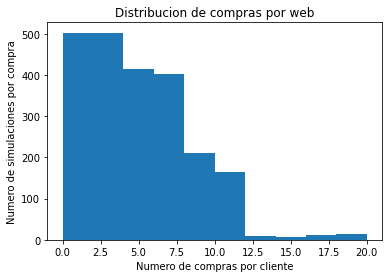

In [117]:
# Vista distribuicion de compras por web
cw = dist_NWP(Q)
plt.hist(np.array(cw))
plt.xlabel("Numero de compras por cliente")
plt.ylabel("Numero de simulaciones por compra")
plt.title("Distribucion de compras por web")

**Compras por catalogo**

Text(0.5, 1.0, 'Distribucion de compras por catalogo')

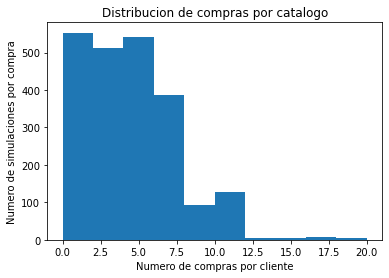

In [118]:
# Vista distribuicion de compras por catalogo
cc = dist_NCP(Q)
plt.hist(np.array(cc))
plt.xlabel("Numero de compras por cliente")
plt.ylabel("Numero de simulaciones por compra")
plt.title("Distribucion de compras por catalogo")

**Compras en presenciales en tienda**

Text(0.5, 1.0, 'Distribucion de compras en tienda')

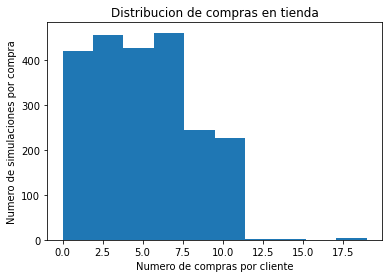

In [119]:
# Vista distribuicion de compras en tienda
cs = dist_NSP(Q)
plt.hist(np.array(cs))
plt.xlabel("Numero de compras por cliente")
plt.ylabel("Numero de simulaciones por compra")
plt.title("Distribucion de compras en tienda")

Con la primera visualizacion de los datos, se puede dar conclusiones parciales de que la concentracion de las compras se encontraran en los numeros menores. Ademas que entre los clientes que tienden a comprar en linea, su numero de compras suele ser mayores a aquellos que compran de manera presencial. En esta parte puede deberse a factores no netos como la comodidad, falta de tiempo o costo de traslado.

#### 2.3 Simulacion de 10,000 situaciones.

Ahora, el objetivo de este proyecto es promover si el numero de compras incrementaran en los proximos meses, y a su vez en que porcentaje se incrementarian los ingresos totales. Para lograr este hecho se simularan con las distribuciones anteriores multiples situaciones, donde se hara el conteo final de la lista del numero de compras y se obtendran metricas estadisticas basicas para comparar los resultados de las simulaciones con los numeros registrados.

In [120]:
# Funcion de retorno de compras totales
def suma_compras():
    """
    Funcion de sumatoria hacia todos los tipos de compras: totales y por tipo.
    """
    cw = dist_NWP(Q)
    cc = dist_NCP(Q)
    cs = dist_NSP(Q)
    
    N_cw = np.sum(cw) #Este es el numero de compras totales por web
    N_cc = np.sum(cc) #Este es el numero de compras totales por catalogo
    N_cs = np.sum(cs) #Este es el numero de compras totales en tienda
    
    Compras_totales = N_cw + N_cc + N_cs
    
    return Compras_totales,N_cw,N_cc,N_cs

# Simulacion de N simulaciones de compras para el proximo mes
N = 10000
simu_compras = [suma_compras() for i in range(0,N)]

En la variable, "simu_compras" se almacenan los resultados del conteo de todas las compras agrupadas por tipo de compra. Con los datos almacenados en esta variable se puede crear una funcion que nos mencione si el numero de compras aumnento o disminuyo conforme al registro oficial, incluso que nos diga la probabilidad de que el objetivo de aumentar el numero de compras se consiga.

In [121]:
# Probabilidad hacia el incremento en las ventas
def prob_h(N):
    """
    Esta funcion describe la probabilidad de que las compras simuladas sean superiores al mes 0.
    ------
    Parametros: N -> Numero de simulaciones requeridas, debe ser el mismo numero que en la lista de simulacion
    """
    c = 0
    for i in range(0,N):
        if simu_compras[i][0] > 25737:
            c +=1
        else:
            c +=0
    return c

print("La probabilidad de que las compras incrementen el proximo mes es de",prob_h(N)/N*100,"%")

La probabilidad de que las compras incrementen el proximo mes es de 100.0 %


#### 2.4 Definicion de metricas de las simulaciones y sus distribuiciones

Se tiene que considerar que cada simulacion tiene una distribucion de datos por metodo de compra diferentes a lo que se propuso en el planteamiento inicial. Esta distribuicion es importante porque define que parte de los ingresos totales corresponde a cada tipo de compra, y saber identificar que metodo de compra debe de disponer de mayor tiempo de atencion por los miembros de la empresa. 

Para esto se calcula la distribucion de cada simulacion y obtener la distribuicion media que sera utlizada para los proximos procesos.

In [122]:
# Tabla de datos y distribuicion de probabilidades
data_b1 = pd.DataFrame(simu_compras)
data_b1.columns = ["Compras totales","NWP","NCP","NSP"]
data_b1["W_NWP"] = round(data_b1["NWP"]/data_b1["Compras totales"],4)
data_b1["W_NCP"] = round(data_b1["NCP"]/data_b1["Compras totales"],4)
data_b1["W_NSP"] = round(data_b1["NSP"]/data_b1["Compras totales"],4)
data_b1.head(10)

,Compras totales,NWP,NCP,NSP,W_NWP,W_NCP,W_NSP
0,30115,10428,8867,10820,0.3463,0.2944,0.3593
1,29535,10225,8616,10694,0.3462,0.2917,0.3621
2,29729,10168,8771,10790,0.3420,0.2950,0.3629
3,30216,10643,8743,10830,0.3522,0.2894,0.3584
4,29747,10259,8834,10654,0.3449,0.2970,0.3582
5,29603,10203,8837,10563,0.3447,0.2985,0.3568
6,29784,10270,8567,10947,0.3448,0.2876,0.3675
7,29405,10274,8558,10573,0.3494,0.2910,0.3596
8,30036,10251,8718,11067,0.3413,0.2903,0.3685
9,30158,10690,8730,10738,0.3545,0.2895,0.3561


In [123]:
# Distribuiciones medias de las varianzas
pm_nwp = data_b1["W_NWP"].mean()
pm_ncp = data_b1["W_NCP"].mean()
pm_nsp = data_b1["W_NSP"].mean()
round(pm_nwp,3),round(pm_ncp,3),round(pm_nsp,3)

(0.343, 0.294, 0.363)

La distribuicion media obtenida de las simulaciones son 34.2% de compras web, 29.5% de compras por catalogo y 36.3% de compras en tienda. Mientras que las establecidas en el planteamiento eran 31.6%, 21.3% y 46.1% respectivamente. con estos resultado se puede concluir que respecto al plateamiento inicial, en las simulaciones las compras en tienda han perdido una gran ponderacion, que se ha pasado a los metodos no presenciales.

### Separación de datos por nodo

In [124]:
#Nodo 1
N_1=np.isfinite(data.NumWebPurchases)

#Nodo 2
N_2=np.isfinite(data.NumCatalogPurchases)
#Nodo 3
N_3=np.isfinite(data.NumStorePurchases)
#Nodo 4
N_4=np.isfinite(data.NumDealsPurchases)

In [125]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            xlabel:'x label',
                            ylabel: 'y label',
                            title: 'title'):
    '''Función para graficar el histograma de una distribución discreta'''
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [126]:
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='u', **kwargs)
    return kde.pdf(x_grid)

def kde_statsmodels_func(x, bandwidth=0.2):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='u')
    return lambda u: kde.pdf(u)

In [127]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Función que aplica el método de la transformada inversa para calcular números que distribuyan como una distribución
    discreta dada'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

In [128]:
def estra_igualmente_espaciado(B:'Número de estratos'):
    """
    Esta función aplica el método de estratficacación con un número de estratos dados a valores aleatorios que se encuentran
    entre 0 y 1
    """
    U= np.random.rand(B)
    i= np.arange(0,B)
    estratos= (U+i)/B
    return estratos

In [129]:
def acep_rechazo_simplificada_dis(
    N:'Cantidad de variables a generar',
    Dom_f:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f'):
    
    X = np.zeros(N)
    i=0
    while i<N:
        R2=np.random.uniform(0,max_f)
        R1=np.random.randint(Dom_f[0], Dom_f[1])
        if R2<= f([R1]):
            X[i]=R1
            i+=1
    return X

In [130]:
#histograma para el nodo 1
#plot_histogram_discrete(, '', 'Frecuencia', 'Histograma de compras web')

SyntaxError: invalid syntax (<ipython-input-130-92aa5e493ec8>, line 2)

In [133]:
#creación de dataframe que contiene los valores únicos sus frecuencias y su probabilidad asociada a cada valor.
N_1_frec_prob=pd.DataFrame({'Valores': np.unique(cw, return_counts=True)[0],
                            'Frecuencias':np.unique(cw, return_counts=True)[1]}) 
N_1_frec_prob['Probabilidad']=N_1_frec_prob['Frecuencias']/len(N_1)

N_1_frec_prob

,Valores,Frecuencias,Probabilidad
0,0,247,0.110268
1,1,256,0.114286
2,2,238,0.106250
3,3,265,0.118304
4,4,181,0.080804
5,5,235,0.104911
6,6,323,0.144196
7,7,79,0.035268
8,8,98,0.043750
9,9,112,0.050000


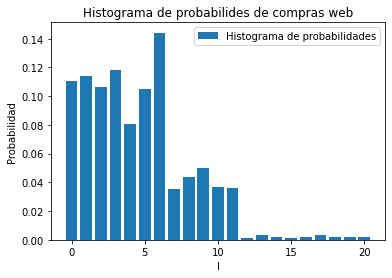

In [134]:
plt.bar(N_1_frec_prob.Valores, N_1_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.xlabel('l')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides de compras web')
plt.legend()
plt.show()

## Kernel density estimation

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


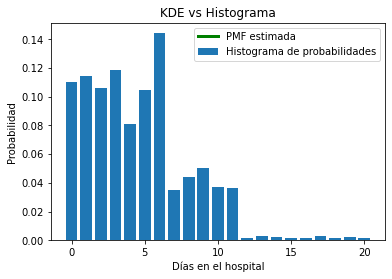

In [135]:
#definimos el grid sobre el que vamos a trabajar
N_1_grid=np.arange(0.6,1.4)

#aplicamos nuestra función 
pmf_N1=kde_statsmodels_m(cw, N_1_grid, bandwidth=0.2)

#gráfica
plt.bar(N_1_frec_prob.Valores, N_1_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.plot(N_1_grid, pmf_N1, label='PMF estimada', color='g', linewidth=3)
plt.xlabel('Días en el hospital')
plt.ylabel('Probabilidad')
plt.title('KDE vs Histograma')
plt.legend()
plt.show()

In [136]:

media_N1= np.sum([N_1_frec_prob.Valores[i]*N_1_frec_prob.Probabilidad[i] 
               for i in range(len(N_1_frec_prob.Frecuencias))])

sigma_N1=np.sqrt(np.sum([N_1_frec_prob.Probabilidad[i]*(N_1_frec_prob.Valores[i] - media_N1)**2
               for i in range(len(N_1_frec_prob.Frecuencias))]))

print('Media por medio de definición de distibuciones discretas: ', media_N1)
print('Desviación estándar por medio de definición de distribuciones discretas: ', sigma_N1)

Media por medio de definición de distibuciones discretas:  4.509821428571429
Desviación estándar por medio de definición de distribuciones discretas:  3.456863251495612


In [137]:
#Se añade la probabilidad acumulada
N_1_frec_prob['Acumulada']=N_1_frec_prob.Probabilidad.cumsum()
N_1_frec_prob

,Valores,Frecuencias,Probabilidad,Acumulada
0,0,247,0.110268,0.110268
1,1,256,0.114286,0.224554
2,2,238,0.106250,0.330804
3,3,265,0.118304,0.449107
4,4,181,0.080804,0.529911
5,5,235,0.104911,0.634821
6,6,323,0.144196,0.779018
7,7,79,0.035268,0.814286
8,8,98,0.043750,0.858036
9,9,112,0.050000,0.908036


## Montecarlo

In [138]:
N = len(N_1)
u1 = np.random.rand(N) #generación de valores aleatorios
f_u1 = Gen_distr_discreta(u1,N_1_frec_prob.Acumulada)+1 #función 
media_montecarlo_N1 = np.mean(f_u1)
sigma_montecarlo_N1= np.std(f_u1)

confianza=[0.95,0.975, 0.99]

intervalos_N1 = st.t.interval(confianza,len(N_1)-1, loc=np.mean(N_1), scale=st.sem(N_1))

montecarlo_N1=pd.DataFrame(intervalos_N1)
montecarlo_N1.index=['Intervalo inferior', 'Intervalo superior']
montecarlo_N1.columns=confianza
montecarlo_N1

,0.950,0.975,0.990
Intervalo inferior,0.897478,0.895767,0.893734
Intervalo superior,0.921272,0.922983,0.925016


## Método de reducción de varianza: estratificación

In [139]:
f_u2= lambda U: Gen_distr_discreta(U, N_1_frec_prob.Acumulada)+1
U= estra_igualmente_espaciado(N)
valores_estrat_N1= f_u2(U)
media_estrat_N1=np.mean(valores_estrat_N1)
sigma_estrat_N1=np.std(valores_estrat_N1)

print('Media con reducción de varianza estratificada=', media_estrat_N1)
print('La desviación estándar con el método de estratificación es: ', sigma_estrat_N1)

Media con reducción de varianza estratificada= 5.509821428571429
La desviación estándar con el método de estratificación es:  3.456863251495612


## Método de reducción de varianza: números complementarios

In [140]:
ri = np.random.rand(N)
ri_c = 1-ri 
U1= f_u2(ri)
U2= f_u2(ri_c)

m4 = (U1.mean()+U2.mean())/2

print('Media por medio del método de números complementarios: ', m4)

Media por medio del método de números complementarios:  5.520982142857143


### 3.0 Aplicacion de reduccion de varianza